# Projekt: Erkennung von Spurmarkierungen
In diesem Projekt sollen Spurmarkierungen in zwei bestehenden Datensätzen erkannt werden: 
1. Udacity Nanodegree "Self-Driving Car Engineer" (https://www.udacity.com/course/self-driving-car-engineer-nanodegree--nd0013)
2. KITTI-Datensatz zur Erkennung von Spurmarkierungen (http://www.cvlibs.net/datasets/kitti/eval_road.php)

In [2]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
import os

print('Willkommen beim Projekt "Erkennung von Spurmarkierungen"')

Willkommen beim Projekt "Erkennung von Spurmarkierungen"


# Exkurs 1: Kamerakalibrierung zur Entzerrung der Bilder
Die vorhandenen Bilder sind aufgrund der Linsen- und Kameraeigenschaften verzerrt. Entzerren Sie die Bilder mithilfe der Kamerakalibrierungsroutinen von OpenCV (https://docs.opencv.org/4.5.3/dc/dbb/tutorial_py_calibration.html) und den aufgezeichneten Bildern.

calibration1.jpg: No corners found!
calibration4.jpg: No corners found!
calibration5.jpg: No corners found!


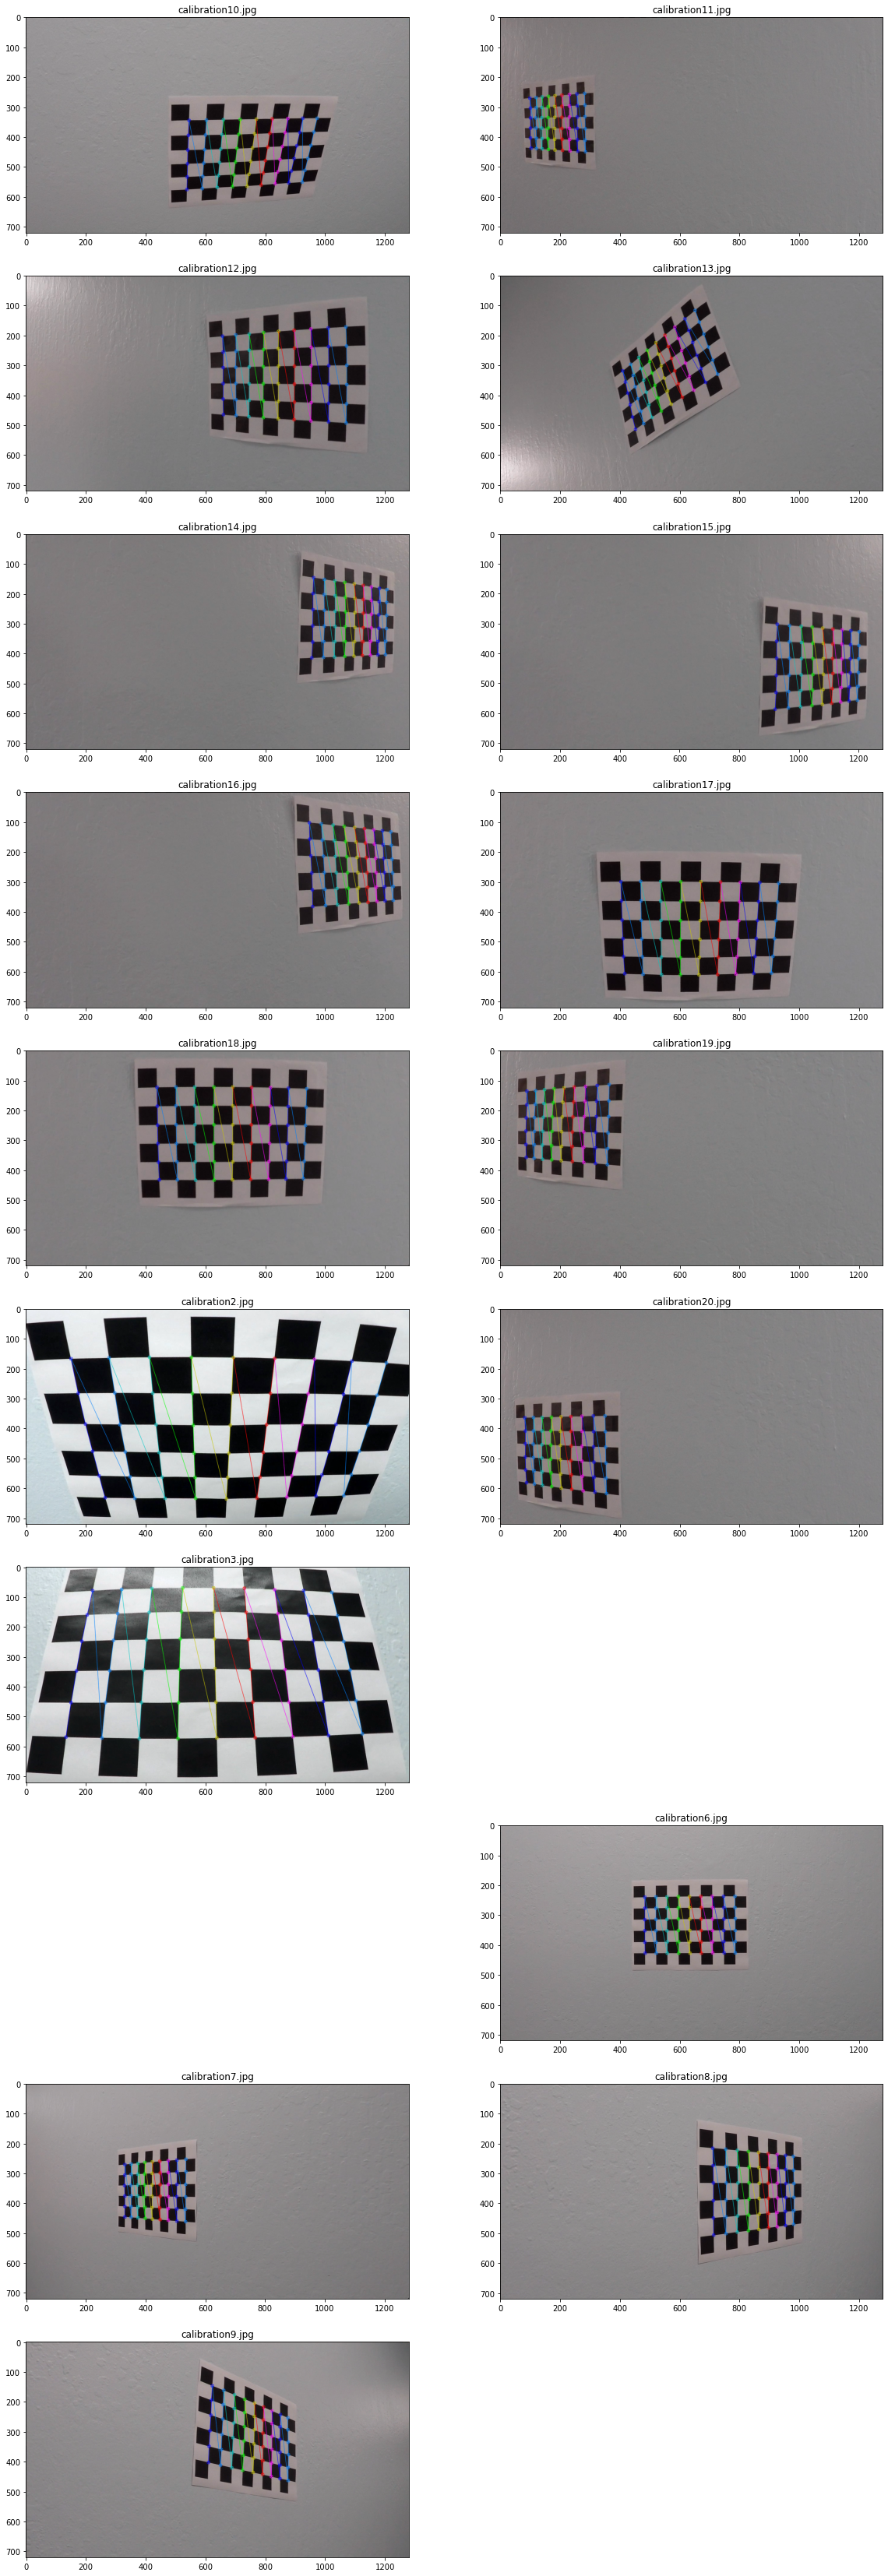

In [3]:
# Import glob to read every .jpg in ./img/Udacity/calib/*.jpg
import glob
import os

boardSize = (6, 9)

# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# Prepare object points. A Calibration picture consists of 10*7 fields
objects = np.zeros((boardSize[1] * boardSize[0], 3), np.float32)
objects[:,:2] = np.mgrid[0:boardSize[0], 0:boardSize[1]].T.reshape(-1, 2)

# Save object and image points
objectPoints = []
imagePoints = []

plt.figure(figsize=(20, 60))
# Go over every calibration file
for index, file in enumerate(glob.glob("img/Udacity/calib/*.jpg")):
    # print(file)
    img = cv.imread(file, cv.COLOR_BGR2RGB)
    gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

    # Let OpenCV find the corners
    ret, corners = cv.findChessboardCorners(gray, boardSize)

    # if any corners where found, save image and objects
    if ret:
        objectPoints.append(objects)

        cornerSub = cv.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)
        imagePoints.append(corners)

        # Display the found corners
        cv.drawChessboardCorners(img, boardSize, cornerSub, ret)

        plt.subplot(10, 2, index)
        plt.imshow(img)
        plt.title(os.path.basename(file))
        # cv.imshow(f"Chessboard corners", img)
        # cv.waitKey(500)
    else:
        print(f"{os.path.basename(file)}: No corners found!")

# cv.destroyAllWindows()
plt.show()

# Exkurs 2: Perspektivtransformation
Durch die Kameraperspektive wird die Krümmung der gefundenen Spurmarkierungen nicht der realen Fahrstreifenkrümmung entsprechen. Transformieren Sie daher die Bilder der Kameraperspektive in eine Vogelperspektive, die der realen Fahrstreifenkrümmung entspricht.

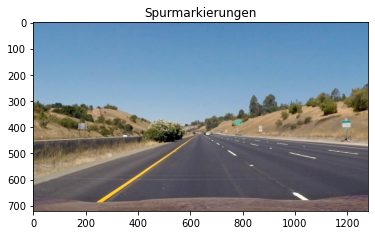

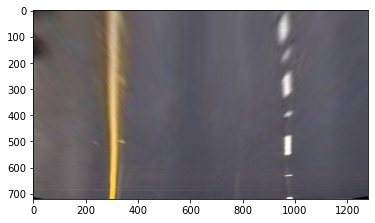

In [4]:
# einlesen eines Beispielbildes
img1 = cv.imread('./img/Udacity/image001.jpg', -1)
plt.imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))
plt.title('Spurmarkierungen')
plt.show()

# definieren Sie die für eine Perspektivtransformation notwendigen Quell- und Zielpunkte
src = np.float32([
    [278, 668], [1026, 668],
    [598, 448], [684, 448]
])
dst = np.float32([
    [300, 720], [980, 720],
    [300, 0], [980, 0]
])

M = cv.getPerspectiveTransform(src,dst)
img1_warp = cv.warpPerspective(img1,M,(img1.shape[1], img1.shape[0]))
plt.imshow(cv.cvtColor(img1_warp, cv.COLOR_BGR2RGB))
plt.show()

# Aufgabe 3: Erkennung von Fahrbahnmarkierungen
Erkennen Sie die Fahrbahnmarkierungen bzw. Fahrstreifen auf den Bildquellen von Udacity. Wenden Sie dabei die aus der Vorlesung bekannten Verfahren an. Gerne dürfen Sie auch weitere Verfahren aus anderen Quellen verwenden. Folgende Ziele müssen bei der finalen Abgabe erreicht werden: 
- **Segmentierung**: schränken Sie das Bild auf den Bereich ein, in dem sich die Spurmarkierungen befinden
- **Vorverarbeitung**: führen Sie eine Kamerakalibrierung (für Udacity-Bildquellen) und die Perspektivtransformation durch
- **Farbräume, Histogramme**: erkennen Sie die Spurmarkierungen in den Farben der angegebenen Quellen. Sofern weitere Spurmarkierungen auf dem Bild gefunden werden, müssen diejenigen Spurmarkierungen priorisiert werden, die die eigene Fahrspur begrenzen
- **Allgemeines**: Die Verarbeitung von Bildern muss in Echtzeit stattfinden --> Ziel: > 20 FPS
- **Allgemeines**: Beschleunigen Sie die Verarbeitung durch weitere Maßnahmen weitere Maßnahmen überlegen (bspw. Erkennung der Spurmarkierung in den ersten Frames, Tracking der Spurmarkierung in weiteren Frames solange, bis sich Spurmarkierungspositionen zu stark ändern)
- **Minimal**: relevante Spurmarkierungen werden im Video "project_video" durchgehend erkannt 
- **Zusatz**: relevante Spurmarkierungen werden im Video "challenge_video" und "harder_challenge_video" durchgehend erkannt
- **Zusatz**: relevante Spurmarkierungen werden auf den Datensatz KITTI angewendet. Welche Anpassungen müssen vorgenommen werden, damit Ihr Algorithmus übertragen werden kann?
- **Zusatz**: Erarbeiten Sie weitere Maßnahmen zur Geschwindigkeitsverbesserung Ihres Algorithmus
- **Zusatz**: Erkennen Sie Objekte im Bild und visualisieren Sie diese (z.B. weitere Fahrzeuge, Motorräder, etc.). Die Objekterkennung bitte so implementieren, dass sie deaktivierbar ist und nicht in FPS-Berechnung einzahlt.

# Ausblick auf weitere Teilaufgaben
- Bestimmung der Kurvenkrümmung anhand von Polynom-Fiting

## Bestimmung von Kurvenpunkten

False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
True 1
False 0
False 0
True 1
False 0
False 0
True 1
False 0


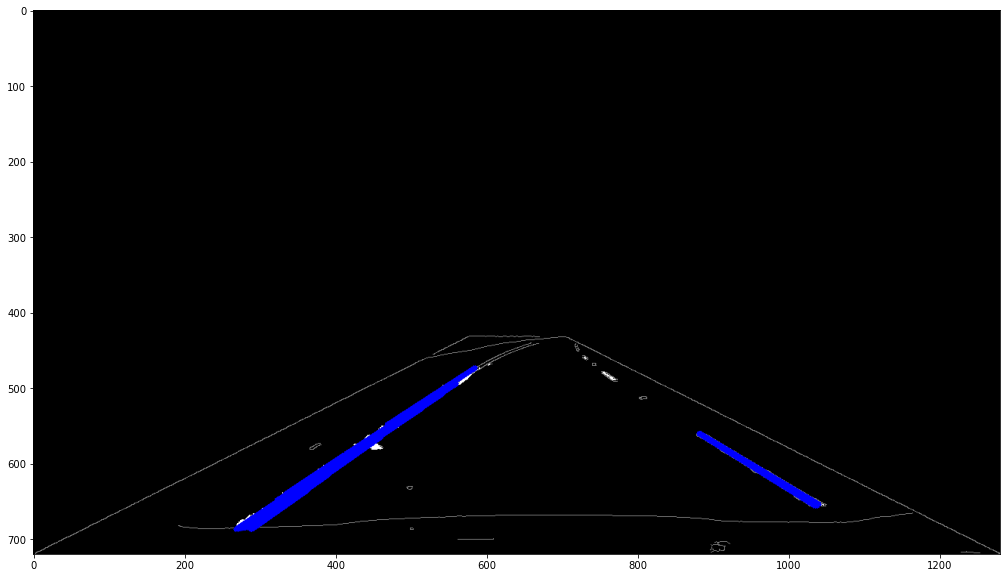

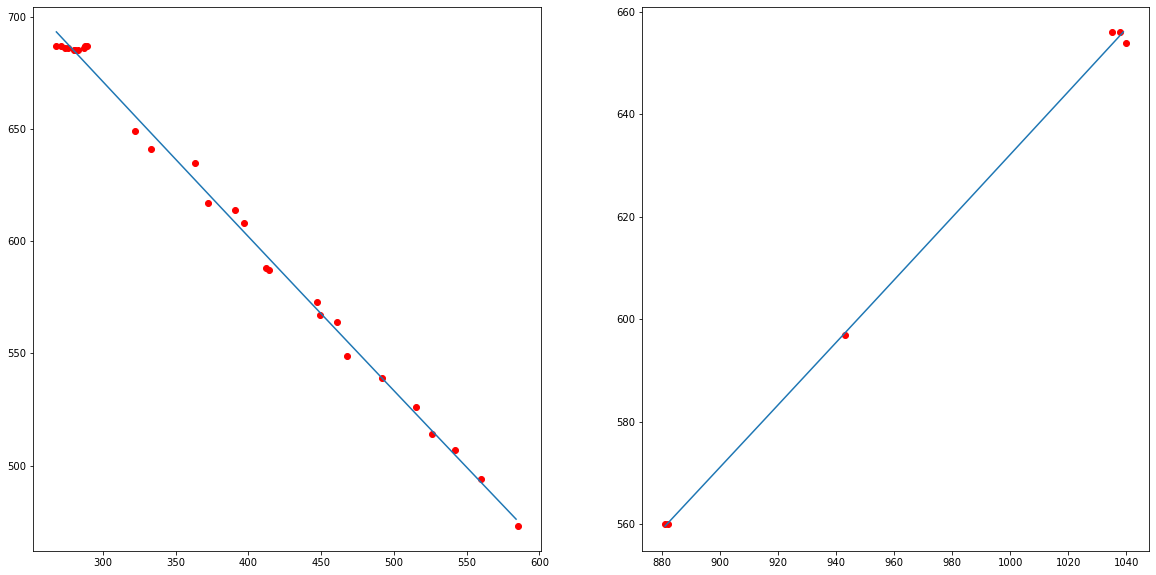

In [45]:
curve_img = cv.imread("img/Udacity/image005.jpg")

# Preprocessing
# Segment
shape = curve_img.shape
polyPoints = np.array(
    [[(.55 * shape[1], 0.6 * shape[0]), (shape[1], shape[0]), (0, shape[0]), (.45 * shape[1], 0.6 * shape[0])]],
    dtype=np.int32
)

mask = np.zeros_like(curve_img, dtype=np.uint8)
if len(shape) > 2:
    channel_count = shape[2]
    ignore_mask_color = (255,) * channel_count
else:
    ignore_mask_color = 255

cv.fillPoly(mask, polyPoints, ignore_mask_color)
curve_img = cv.bitwise_and(curve_img, mask)

# Shapes
gray_image = cv.cvtColor(curve_img, cv.COLOR_RGB2GRAY)
blur = cv.GaussianBlur(gray_image, (5, 5), 0)
canny = cv.Canny(blur, 50, 150)

# Colors
img_hsv = cv.cvtColor(curve_img, cv.COLOR_RGB2HSV)

min_yellow = np.array([20, 100, 100], dtype="uint8")
max_yellow = np.array([100, 255, 255], dtype="uint8")

sensitivity = 15
min_white = np.array([0, 0, 255 - sensitivity], dtype="uint8")
max_white = np.array([255, sensitivity, 255], dtype="uint8")

mask_yellow = cv.inRange(img_hsv, min_yellow, max_yellow)
mask_white = cv.inRange(img_hsv, min_white, max_white)

mask_wy = cv.bitwise_or(mask_white, mask_yellow)

# Use closing to close holes
color = cv.morphologyEx(mask_wy, cv.MORPH_CLOSE, cv.getStructuringElement(cv.MORPH_CROSS, (5, 5)), iterations=5)

# Combined
combined = cv.addWeighted(canny, 0.5, color, 1, 0)
houghImg = combined.copy()
combined = cv.cvtColor(combined, cv.COLOR_GRAY2RGB)

# Performance hough
lines = cv.HoughLinesP(houghImg, 1, np.pi / 180, 150)

# Split lines into left and right
points_left = [[], []]
points_right = [[], []]

if lines is not None:
    for line in lines:
        line = line[0]
        x1, y1 = (line[0], line[1])
        x2, y2 = (line[2], line[3])

        startX = min(x1, x2)
        if abs(y1 - y2) > 50 and y1 > shape[0] - 250 and 100 < startX < shape[1] - 100:
            # A line is from the left lane if the angle is bigger than 270°
            angle = cv.fastAtan2(y2 - y1, x2 - x1)
            print(angle < 270, int(angle < 270))
            if angle > 270:
                points_left[0].append(x1)
                points_left[0].append(x2)

                points_left[1].append(y1)
                points_left[1].append(y2)
            else:
                points_right[0].append(x1)
                points_right[0].append(x2)

                points_right[1].append(y1)
                points_right[1].append(y2)

            cv.line(combined, (x1, y1), (x2, y2), (0, 0, 255), 5)

plt.figure(figsize=(20, 10))
plt.imshow(combined)
plt.show()

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(points_left[0], points_left[1], "or")

w = np.polyfit(points_left[0], points_left[1], 2)
y_est = np.poly1d(w)
plt.plot(np.arange(min(points_left[0]), max(points_left[0])), y_est(np.arange(min(points_left[0]), max(points_left[0]))))

plt.subplot(1, 2, 2)
plt.plot(points_right[0], points_right[1], "or")

w = np.polyfit(points_right[0], points_right[1], 2)
y_est = np.poly1d(w)
plt.plot(np.arange(min(points_right[0]), max(points_right[0])), y_est(np.arange(min(points_right[0]), max(points_right[0]))))

plt.show()